# Whiskey Recommendations

Dimensionality Reduction via PCA & K-Means Clustering to discover which whiskey brands cluster well together. 

Credit: https://github.com/darrenklee79/RH_MachineLearning

In [1]:
#Imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import load_digits

plt.style.use('fivethirtyeight')

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load in the wine data
whiskey = pd.read_csv("/Users/darrenklee/Downloads/RH_MachineLearning-master/whiskey_data.csv")
whiskey.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1


In [3]:
whiskey.shape

(86, 13)

In [4]:
y = whiskey.Distillery

In [5]:
whiskey.drop("Distillery", axis = 1, inplace= True)

In [ ]:
# results are similar with or without scaling data since metrics are already in the same rating scale.

#Intialize scaler
#scale = StandardScaler()

#Fit and transform whiskey data using standard scaler
#whiskey_s = scale.fit_transform(whiskey)
#whiskey_s[0]

In [6]:
#Intialize PCA object
#We're deliberating leaving the n_components parameters alone
pca = PCA()

#Fit and transform wine_s use pca
whiskey_pca = pca.fit_transform(whiskey)

#Number of components
pca.n_components_

12

In [54]:
pca.explained_variance_ratio_

array([0.30110979, 0.19217886, 0.09560193, 0.08250322, 0.07230864,
       0.0599231 , 0.05108089, 0.04587064, 0.03498097, 0.03197728,
       0.02297382, 0.00949085])

Best practice says that 85% variance is appropriate when selecting the number of components. We want to preserve a significant amount of essense from the original dataset. 85% variance is explained around 7 PC's for Whiskey data.

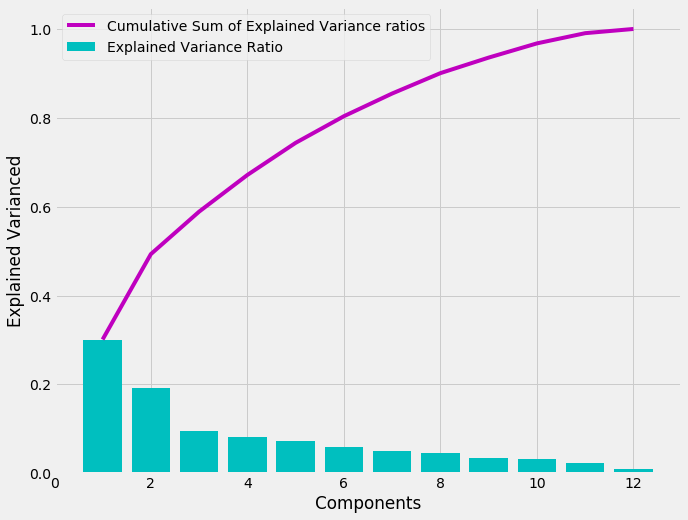

In [8]:
plt.figure(figsize=(10, 8))

components = range(1, pca.n_components_ +1)

plt.bar(components, pca.explained_variance_ratio_, label = "Explained Variance Ratio", color = "c")
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), 
         c = "m", label = "Cumulative Sum of Explained Variance ratios")

plt.xlabel("Components")
plt.ylabel("Explained Varianced")
plt.legend();

In [9]:
#Component 1
for col, comp in zip(whiskey.columns, pca.components_[0]):
    print col, comp

    # Medicinal, Smoky, Floral are the highest weights

Body 0.3611900464908535
Sweetness -0.20298237514149176
Smoky 0.47794418500826474
Medicinal 0.5752767838475031
Tobacco 0.09173305556953329
Honey -0.22090803615572563
Spicy 0.05811100779190869
Winey -0.037456084609092576
Nutty -0.0476641006464097
Malty -0.12781608284716162
Fruity -0.20235755227918972
Floral -0.3839444305733929


In [11]:
#Component 2
for col, comp in zip(whiskey.columns, pca.components_[1]):
    print col, comp

    # Winey, Body, Honey, Nutty

Body 0.4913064279869419
Sweetness 0.046596335277670986
Smoky 0.06874215908872161
Medicinal -0.16079483872662914
Tobacco -0.02004775731231937
Honey 0.4179949062196067
Spicy 0.17548310068040956
Winey 0.6396497903569632
Nutty 0.26036121612559754
Malty 0.10296201740745951
Fruity 0.12374977170084027
Floral -0.13074914051788616


In [12]:
#Component 3
for col, comp in zip(whiskey.columns, pca.components_[2]):
    print col, comp

    # Spicy, Fruity, Floral, Winey

Body -0.030117809612909215
Sweetness 0.26387922303177835
Smoky -0.21881006471587386
Medicinal -0.04315984323590928
Tobacco 0.0006685358765630978
Honey -0.11024711341814514
Spicy -0.6992443905781839
Winey 0.23312958712638182
Nutty 0.17855290385802094
Malty -0.10841698991368517
Fruity -0.40346277907350037
Floral -0.34330083647631787


In [13]:
y.nunique()

86

In [72]:
y = pd.DataFrame(y)
y.shape

(86, 1)

In [73]:
# Taking the first 7 PC's where at least 85% of explained variance is:
X = whiskey_pca[:, :7]
X = pd.DataFrame(X)
X.shape

(86, 7)

In [79]:
pca.explained_variance_ratio_[:7].sum()

0.854706436846231

In [16]:
df = pd.concat([X, y], axis= 1)
df.head()

,0,1,2,3,4,5,6,Distillery
0,-0.503384,1.122022,0.161200,-0.505825,0.284150,-0.332995,-0.643743,Aberfeldy
1,-1.478888,3.004851,-1.517091,0.138537,0.710289,-0.380669,1.166455,Aberlour
2,-1.253113,-0.653721,0.284720,-0.927474,-0.112759,-0.546753,0.623491,AnCnoc
3,5.271724,-0.510075,-0.806672,-0.204075,0.024691,-0.513550,0.413148,Ardbeg
4,0.213466,0.174339,0.676664,-0.526576,0.486221,-0.576853,0.374729,Ardmore


In [17]:
df.shape

(86, 8)

In [18]:
df.to_csv("whiskey_pca_ready.csv")

In [19]:
df2 = df

In [20]:
# create indice for Distilelery names across 7 PC's:
df2.set_index("Distillery", inplace= True)

In [21]:
df2.tail()

,0,1,2,3,4,5,6
Distillery,,,,,,,
Tobermory,-0.854163,-1.617761,0.310928,-0.601909,-0.164761,-1.409804,-0.593777
Tomatin,0.225524,0.327340,0.464379,0.999474,1.830340,0.430963,0.641974
Tomintoul,-1.561102,-0.731014,-0.003339,0.695171,1.500134,0.222122,0.269767
Tormore,0.519345,-0.268811,2.558316,-0.222523,0.522640,-0.014122,0.229859
Tullibardine,-0.601530,-0.418682,0.316236,1.087070,-1.163241,0.418737,0.790442


In [22]:
# df2.to_csv("whiskey_pca_tf.csv", sep= '\t', header= True, index= True)

Take export from above and import into TensorFlow Projector to see how well they cluster:
http://projector.tensorflow.org/

# K-Means
Following the example from the RH Machine Learning github, 11 clusters was what they used from the Scree Plot. We will also select 11 clusters which is an arbitrary number until further discovery using the Inertia method here.

In [24]:
df_km = X.copy()

In [25]:
df_km.head()

,0,1,2,3,4,5,6
0,-0.503384,1.122022,0.161200,-0.505825,0.284150,-0.332995,-0.643743
1,-1.478888,3.004851,-1.517091,0.138537,0.710289,-0.380669,1.166455
2,-1.253113,-0.653721,0.284720,-0.927474,-0.112759,-0.546753,0.623491
3,5.271724,-0.510075,-0.806672,-0.204075,0.024691,-0.513550,0.413148
4,0.213466,0.174339,0.676664,-0.526576,0.486221,-0.576853,0.374729


In [26]:
#Intialize kmeans with 3 clusters and random_state = 10
km11 = KMeans(n_clusters= 11)

#Fit model
km11.fit(X)

#Generate labels

##Method 1
labels11 = km11.labels_
##Method 2
labels11 = km11.predict(X)


#Add labs3 to df2
df_km["labels11"] = labels11

#Value_counts
df_km.labels11.value_counts()

1     15
5     12
3     12
7     11
10     9
2      9
6      5
9      4
0      4
4      3
8      2
Name: labels11, dtype: int64

In [27]:
#Silhoeute score
print silhouette_score(X, df_km.labels11)

# Inertia score
print km11.inertia_

0.1530050885378737
201.37637259878778


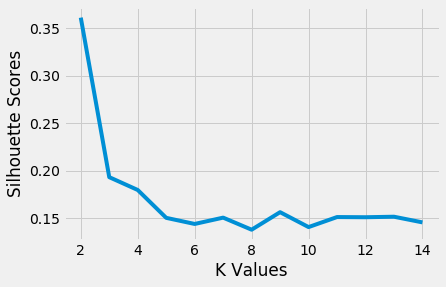

In [29]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 15)

#Intialize list to store silhouette scores
s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters = cluster)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.plot(cluster_range, s_scores, linewidth = 4)
plt.xlabel("K Values")
plt.ylabel("Silhouette Scores");

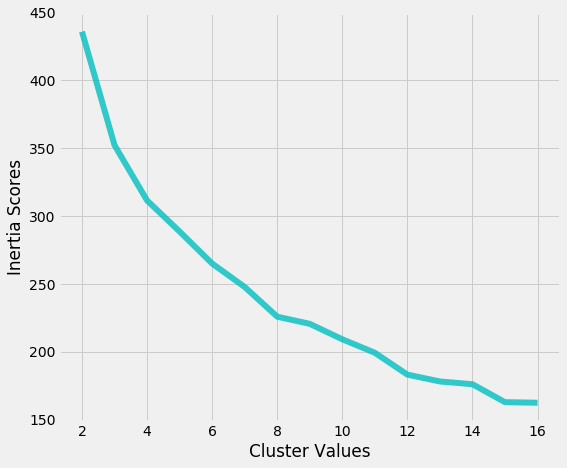

In [30]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(8, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "c")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

In [35]:
y.head()

,Distillery
0,Aberfeldy
1,Aberlour
2,AnCnoc
3,Ardbeg
4,Ardmore


In [44]:
#Create dataframe with whiskey Distillery as indices and use labels11 as the values

dist_labels = pd.DataFrame(data = labels11, columns = ["cluster"])
dist_labels = pd.concat([y, dist_labels], axis = 1)
dist_labels.set_index("Distillery", inplace=True)

In [45]:
# Let's see the count within each cluster. Cluster 1 has the most similar types of whiskey.
dist_labels.cluster.value_counts()

1     15
5     12
3     12
7     11
10     9
2      9
6      5
9      4
0      4
4      3
8      2
Name: cluster, dtype: int64

In [46]:
#Cluster 1
dist_labels[dist_labels.cluster == 1].sample(15).index

Index([u'Belvenie', u'Deanston', u'Benrinnes', u'Dalwhinnie', u'Scapa',
       u'OldFettercairn', u'Benromach', u'BenNevis', u'Ardmore',
       u'Highland Park', u'Aberfeldy', u'Bruichladdich', u'Springbank',
       u'Tomatin', u'Bowmore'],
      dtype='object', name=u'Distillery')

In [48]:
#Cluster 3
dist_labels[dist_labels.cluster == 3].sample(12).index

Index([u'GlenGrant', u'Aultmore', u'Cardhu', u'Auchentoshan', u'Longmorn',
       u'Glengoyne', u'Tobermory', u'AnCnoc', u'Tamdhu', u'Mannochmore',
       u'Speyside', u'Edradour'],
      dtype='object', name=u'Distillery')

In [50]:
#Cluster 7
dist_labels[dist_labels.cluster == 7].sample(11).index

Index([u'Tomintoul', u'Loch Lomond', u'Bladnoch', u'Inchgower',
       u'Bunnahabhain', u'Speyburn', u'Glenlossie', u'Glenkinchie',
       u'Benriach', u'Glenallachie', u'Glenfiddich'],
      dtype='object', name=u'Distillery')

In [51]:
#Cluster 8
dist_labels[dist_labels.cluster == 8].sample(2).index

Index([u'Laphroig', u'Lagavulin'], dtype='object', name=u'Distillery')

In [53]:
#Cluster 0
dist_labels[dist_labels.cluster == 0].sample(4).index

Index([u'Ardbeg', u'Clynelish', u'Caol Ila', u'Talisker'], dtype='object', name=u'Distillery')

We can use the function below to find out which cluster a specific brand belongs to within this dataset. "Talisker" is within Cluster 0. Since I'm not a whiskey expert, I will rely on the experts and use my 3rd Party Research insights to cross reference some of these cluster outputs. 

Laphroaig and Lagavulin going head to head in this post:
https://www.whiskyandwisdom.com/?p=64

Now that we've gained a bit more conviction, let's move along!

In [52]:
c_range = range(0, 10)

yes = []

for i in c_range:
    w = "Talisker" in dist_labels[dist_labels.cluster == i].index
    yes.append(w)
print yes

[True, False, False, False, False, False, False, False, False, False]


Take a look below to see the index number with the Distillery name, and compare with the clusters in TensorFlow.

In [ ]:
[(0, 'Aberfeldy'),
 (1, 'Aberlour'),
 (2, 'AnCnoc'),
 (3, 'Ardbeg'),
 (4, 'Ardmore'),
 (5, 'ArranIsleOf'),
 (6, 'Auchentoshan'),
 (7, 'Auchroisk'),
 (8, 'Aultmore'),
 (9, 'Balblair'),
 (10, 'Balmenach'),
 (11, 'Belvenie'),
 (12, 'BenNevis'),
 (13, 'Benriach'),
 (14, 'Benrinnes'),
 (15, 'Benromach'),
 (16, 'Bladnoch'),
 (17, 'BlairAthol'),
 (18, 'Bowmore'),
 (19, 'Bruichladdich'),
 (20, 'Bunnahabhain'),
 (21, 'Caol Ila'),
 (22, 'Cardhu'),
 (23, 'Clynelish'),
 (24, 'Craigallechie'),
 (25, 'Craigganmore'),
 (26, 'Dailuaine'),
 (27, 'Dalmore'),
 (28, 'Dalwhinnie'),
 (29, 'Deanston'),
 (30, 'Dufftown'),
 (31, 'Edradour'),
 (32, 'GlenDeveronMacduff'),
 (33, 'GlenElgin'),
 (34, 'GlenGarioch'),
 (35, 'GlenGrant'),
 (36, 'GlenKeith'),
 (37, 'GlenMoray'),
 (38, 'GlenOrd'),
 (39, 'GlenScotia'),
 (40, 'GlenSpey'),
 (41, 'Glenallachie'),
 (42, 'Glendronach'),
 (43, 'Glendullan'),
 (44, 'Glenfarclas'),
 (45, 'Glenfiddich'),
 (46, 'Glengoyne'),
 (47, 'Glenkinchie'),
 (48, 'Glenlivet'),
 (49, 'Glenlossie'),
 (50, 'Glenmorangie'),
 (51, 'Glenrothes'),
 (52, 'Glenturret'),
 (53, 'Highland Park'),
 (54, 'Inchgower'),
 (55, 'Isle of Jura'),
 (56, 'Knochando'),
 (57, 'Lagavulin'),
 (58, 'Laphroig'),
 (59, 'Linkwood'),
 (60, 'Loch Lomond'),
 (61, 'Longmorn'),
 (62, 'Macallan'),
 (63, 'Mannochmore'),
 (64, 'Miltonduff'),
 (65, 'Mortlach'),
 (66, 'Oban'),
 (67, 'OldFettercairn'),
 (68, 'OldPulteney'),
 (69, 'RoyalBrackla'),
 (70, 'RoyalLochnagar'),
 (71, 'Scapa'),
 (72, 'Speyburn'),
 (73, 'Speyside'),
 (74, 'Springbank'),
 (75, 'Strathisla'),
 (76, 'Strathmill'),
 (77, 'Talisker'),
 (78, 'Tamdhu'),
 (79, 'Tamnavulin'),
 (80, 'Teaninich'),
 (81, 'Tobermory'),
 (82, 'Tomatin'),
 (83, 'Tomintoul'),
 (84, 'Tormore'),
 (85, 'Tullibardine')]

# K-Means Clustering in h2o.ai

7 principal components, and 86 unique Distillery classifiers. We are essentially running the same K-Means methodology, but this time with h2o.ai. K-Means clustering performed on H2o.ai with labeled outputs in "whiskey_pred". 11 clusters created.

Instructions:

https://github.com/LenaTash/RH_MachineLearning/blob/master/WhiskeyExample_GUI

In [56]:
whiskey_pred = pd.read_csv("/Users/darrenklee/Downloads/RH_MachineLearning-master/prediction_K_Means.csv")

In [57]:
whiskey_pred.drop("C1", axis = 1, inplace= True)

In [58]:
whiskey_pred.set_index("Distillery", inplace= True)

In [59]:
whiskey_pred.shape

(86, 8)

In [60]:
whiskey_pred.predict.value_counts()

4     27
9     14
6     11
2      9
1      9
10     3
7      3
5      3
0      3
8      2
3      2
Name: predict, dtype: int64

In [63]:
#Cluster 4, 
whiskey_pred[whiskey_pred.predict == 4].sample(n = 27).index

Index([u'GlenGrant', u'Bunnahabhain', u'Cardhu', u'Glengoyne', u'Glenallachie',
       u'Aultmore', u'Oban', u'Mannochmore', u'Auchentoshan', u'AnCnoc',
       u'Glenfiddich', u'Glenlossie', u'Tobermory', u'Speyside', u'Deanston',
       u'Craigganmore', u'GlenScotia', u'Isle of Jura', u'Scapa', u'Tamdhu',
       u'Bladnoch', u'Dalwhinnie', u'Dufftown', u'Loch Lomond', u'Longmorn',
       u'Ardmore', u'Glenkinchie'],
      dtype='object', name=u'Distillery')

In [64]:
#Cluster 9, 
whiskey_pred[whiskey_pred.predict == 9].sample(n = 14).index

Index([u'Benromach', u'Mortlach', u'BlairAthol', u'Belvenie', u'Strathisla',
       u'GlenOrd', u'Bruichladdich', u'Benriach', u'Aberlour', u'Aberfeldy',
       u'BenNevis', u'Benrinnes', u'GlenMoray', u'Glenlivet'],
      dtype='object', name=u'Distillery')

In [71]:
#Cluster 6, 
whiskey_pred[whiskey_pred.predict == 6].sample(n = 11).index

Index([u'Inchgower', u'Tomintoul', u'Speyburn', u'GlenSpey', u'Highland Park',
       u'Bowmore', u'Tormore', u'Glenturret', u'Springbank', u'ArranIsleOf',
       u'Tomatin'],
      dtype='object', name=u'Distillery')

Above are the top 3 clusters with similarities in attributes. You can type in your favorite whiskey brand out of this dataset below, and see what other items they cluster well with! The example given is "Laphroig" (mispelled: Laphroaig), which clusters well with one other drink, Lagavulin. 

In [66]:
c_range = range(0, 10)

yes = []

for i in c_range:
    w = "Talisker" in whiskey_pred[whiskey_pred.predict == i].index
    yes.append(w)
print yes

[False, False, False, False, False, False, False, True, False, False]


In [67]:
#Cluster 3, 
whiskey_pred[whiskey_pred.predict == 3].sample(n = 2).index

Index([u'Laphroig', u'Lagavulin'], dtype='object', name=u'Distillery')

In [68]:
#Cluster 7, 
whiskey_pred[whiskey_pred.predict == 7].sample(n = 3).index

Index([u'GlenGarioch', u'Ardbeg', u'Talisker'], dtype='object', name=u'Distillery')

In [69]:
#Cluster 1, 
whiskey_pred[whiskey_pred.predict == 1].sample(n = 9).index

Index([u'Teaninich', u'Balblair', u'GlenElgin', u'GlenKeith', u'Linkwood',
       u'Knochando', u'Strathmill', u'Tamnavulin', u'Glenmorangie'],
      dtype='object', name=u'Distillery')